In [1]:
import pandas as pd
import numpy as np
import seaborn
import itertools
import matplotlib.pyplot as plt
from pathlib import Path

seaborn.set_context("paper")
seaborn.set_theme()
%matplotlib inline

In [2]:
!ls

cray.openacc.mi100.csv		     nvidia.openmp-loop-bind.v100.csv
cray.openmp-loop-bind.mi100.csv      nvidia.openmp-loop.a100.csv
cray.openmp-loop.mi100.csv	     nvidia.openmp-loop.skylake.csv
cray.openmp.mi100.csv		     nvidia.openmp-loop.v100.csv
nvidia.openacc.a100.csv		     nvidia.openmp.a100.csv
nvidia.openacc.skylake.csv	     nvidia.openmp.skylake.csv
nvidia.openacc.v100.csv		     nvidia.openmp.v100.csv
nvidia.openmp-loop-bind.a100.csv     plots.ipynb
nvidia.openmp-loop-bind.skylake.csv


In [3]:
def read_csv(fname):
    print(fname)
    df = pd.read_csv(fname)
    compiler, model, arch = str(fname).split(".")[0:3]
    df['arch'] = arch
    df['compiler'] = compiler
    df['model'] = model
    return df

In [4]:
df = pd.concat(read_csv(f) for f in Path(".").glob("*.csv"))

nvidia.openacc.a100.csv
cray.openmp-loop.mi100.csv
cray.openacc.mi100.csv
nvidia.openmp.skylake.csv
nvidia.openmp-loop.skylake.csv
nvidia.openmp-loop.a100.csv
nvidia.openmp-loop-bind.v100.csv
cray.openmp.mi100.csv
nvidia.openmp.a100.csv
nvidia.openacc.skylake.csv
nvidia.openmp.v100.csv
nvidia.openmp-loop.v100.csv
nvidia.openacc.v100.csv
nvidia.openmp-loop-bind.a100.csv
nvidia.openmp-loop-bind.skylake.csv
cray.openmp-loop-bind.mi100.csv


In [5]:
df['rate (G)'] = 1e-9 * df['n']**2 / df['time']
df['log2n'] = np.log2(df['n'])
df['density'] = df['nnz'] / (df['n']*df['n'])

In [6]:
df.head()

iteration    n  nparticles      routine  nnz      time  arch compiler  \
0         1  4.0         4.0  bitrep_only  0.0  0.000058  a100   nvidia   
1         1  4.0         4.0  detail_only  0.0  0.000035  a100   nvidia   
2         1  4.0         4.0     combined  0.0  0.000017  a100   nvidia   
3         2  4.0         4.0  bitrep_only  0.0  0.000017  a100   nvidia   
4         2  4.0         4.0  detail_only  0.0  0.000014  a100   nvidia   

     model  rate (G)  log2n  density  
0  openacc  0.000276    2.0      0.0  
1  openacc  0.000457    2.0      0.0  
2  openacc  0.000947    2.0      0.0  
3  openacc  0.000930    2.0      0.0  
4  openacc  0.001135    2.0      0.0

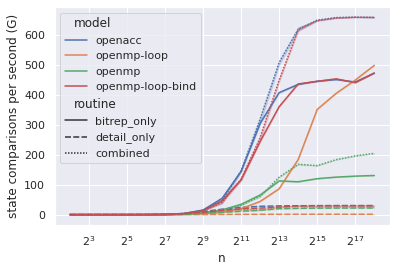

In [7]:
m = (df['nparticles']==8) & (df['arch'] == 'a100') & (df['compiler'] == 'nvidia')
ax = seaborn.lineplot(data=df[m], x='n', y='rate (G)', hue='model', style='routine')
#ax.set(yscale='log')
ax.set_xscale('log', base=2)
ax.set_ylabel('state comparisons per second (G)')
plt.savefig("count_nonzero_a100_nparticles_8.pdf")

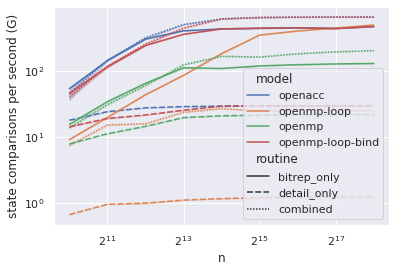

In [8]:
m = (df['nparticles']==8) & (df['arch'] == 'a100') & (df['compiler'] == 'nvidia') & (df['n'] > 2**9)
ax = seaborn.lineplot(data=df[m], x='n', y='rate (G)', hue='model', style='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
ax.set_ylabel('state comparisons per second (G)')
plt.savefig("count_nonzero_a100_nparticles_8_v2.pdf")

In [9]:
m = (df['nparticles']==8) & (df['arch'] == 'a100') & (df['compiler'] == 'nvidia')
df['density'][m].describe()

count    1020.000000
mean        0.000005
std         0.000007
min         0.000000
25%         0.000000
50%         0.000006
75%         0.000006
max         0.000061
Name: density, dtype: float64

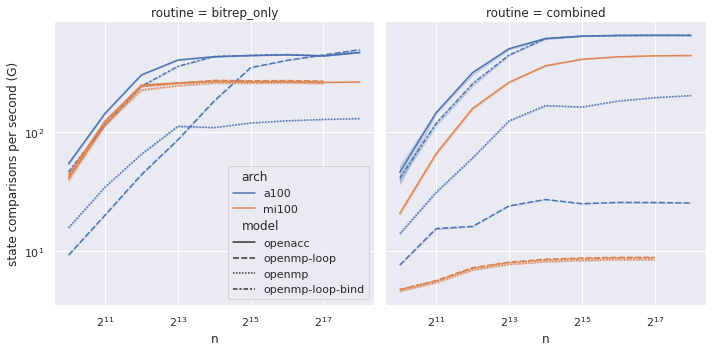

In [18]:
m = (df['nparticles']==8) & (df['routine'] != 'detail_only') & (df['n'] > 2**9) & (df['arch'] != 'v100') & (df['arch'] != 'skylake')
fg = seaborn.relplot(data=df[m], x='n', y='rate (G)', hue='arch', style='model', col='routine', kind='line', 
                     facet_kws={"legend_out":False})
for ax in fg.axes[0]:
    ax.set_xscale('log', base=2)
    ax.set_yscale('log')
fg.set_ylabels('state comparisons per second (G)')
fg.tight_layout()
plt.savefig("count_nonzero_arch_routine_model_np8.pdf", dpi=600)#, dpi=300)

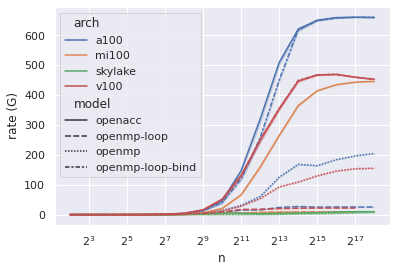

In [11]:
m = (df['nparticles']==8) & (df['routine'] == 'combined')
ax = seaborn.lineplot(data=df[m], x='n', y='rate (G)', hue='arch', style='model')
ax.set_xscale('log', base=2)
#ax.set_yscale('log')
#plt.savefig("count_nonzero_arch_nparticles_12.pdf")

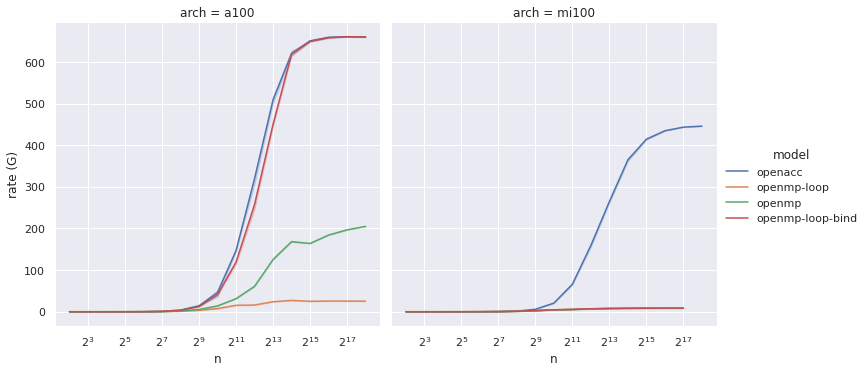

In [12]:
m = (df['nparticles']==8) & (df['routine'] == 'combined') & (df['arch'] != 'skylake') & (df['arch'] != 'v100')
fg = seaborn.relplot(data=df[m], x='n', y='rate (G)', hue='model', col='arch', kind='line')
for ax in fg.axes[0]:
    ax.set_xscale('log', base=2)
#plt.savefig("count_nonzero_arch_relplot.pdf")

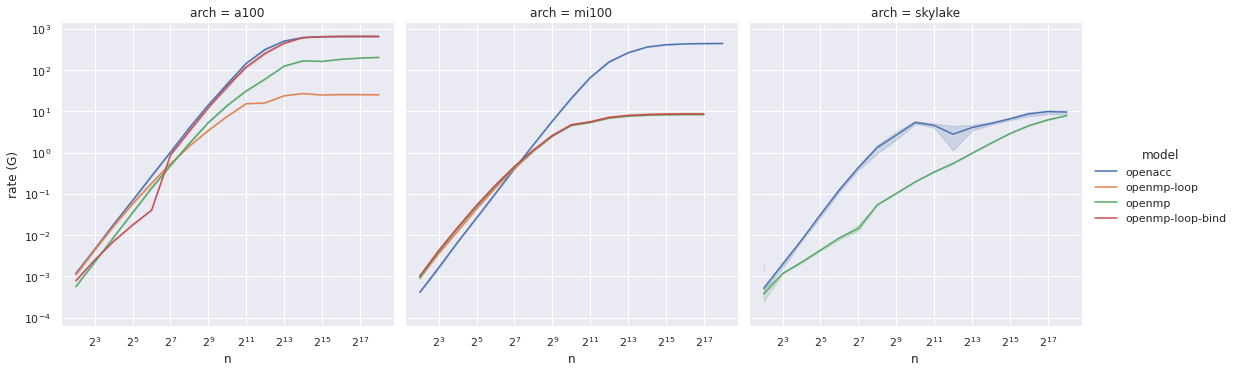

In [13]:
m = (df['nparticles']==8) & (df['routine'] == 'combined') & (df['arch'] != 'v100')
fg = seaborn.relplot(data=df[m], x='n', y='rate (G)', hue='model', col='arch', kind='line')
for ax in fg.axes[0]:
    ax.set_xscale('log', base=2)
    ax.set_yscale('log')